# 🥔 Potato Disease Classification using CNN
**Dataset**: Kaggle (mgmitesh/potato-disease-detection-dataset)

Model to classify: Early Blight, Late Blight, Healthy

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os


In [8]:
# Dataset path (already extracted)
data_dir = r"C:\Users\soumy\Potato Disease Classification\potatodataset"
class_names = os.listdir(data_dir)
print("Classes:", class_names)


Classes: ['.ipynb_checkpoints', 'potato-dataset', 'potato-disease-classification-code.ipynb']


In [9]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
SEED = 123


In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=SEED,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

class_names = dataset.class_names
print("Class Names:", class_names)


Found 2152 files belonging to 1 classes.
Class Names: ['potato-dataset']


In [11]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
IMAGE_SIZE = 256

model = keras.Sequential([
    keras.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),   #  Preferred Input layer
    layers.Rescaling(1./255),                         #  Now no input_shape needed here
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


In [14]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\soumy\Potato Disease Classification\potatodataset",
    validation_split=0.2,
    subset="training",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\Users\soumy\Potato Disease Classification\potatodataset",
    validation_split=0.2,
    subset="validation",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 2152 files belonging to 1 classes.
Using 1722 files for training.
Found 2152 files belonging to 1 classes.
Using 430 files for validation.


In [16]:
# Create full dataset
IMAGE_SIZE = 256
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\soumy\Potato Disease Classification\potatodataset",
    validation_split=0.2,
    subset="training",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\soumy\Potato Disease Classification\potatodataset",
    validation_split=0.2,
    subset="validation",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 2152 files belonging to 1 classes.
Using 1722 files for training.
Found 2152 files belonging to 1 classes.
Using 430 files for validation.


In [13]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 984ms/step - accuracy: 0.9292 - loss: 0.0911 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 52s 973ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 974ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 931ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 833ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 701ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 673ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 670

In [25]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # ya jitne bhi epochs chahiye
)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 690ms/step - accuracy: 0.9238 - loss: 0.0917 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 704ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 813ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 871ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 805ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 726ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 728ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 716

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()


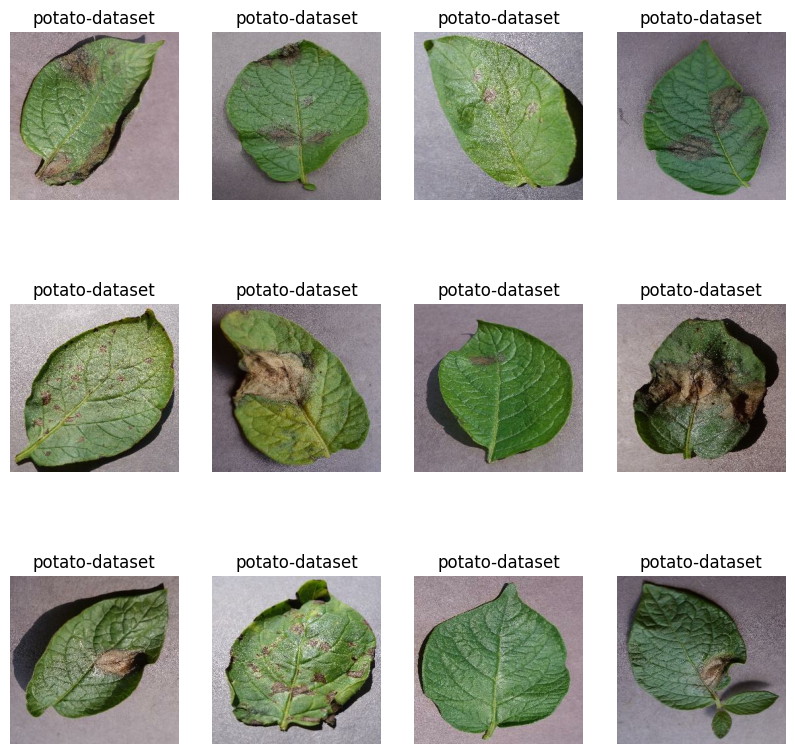

In [26]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

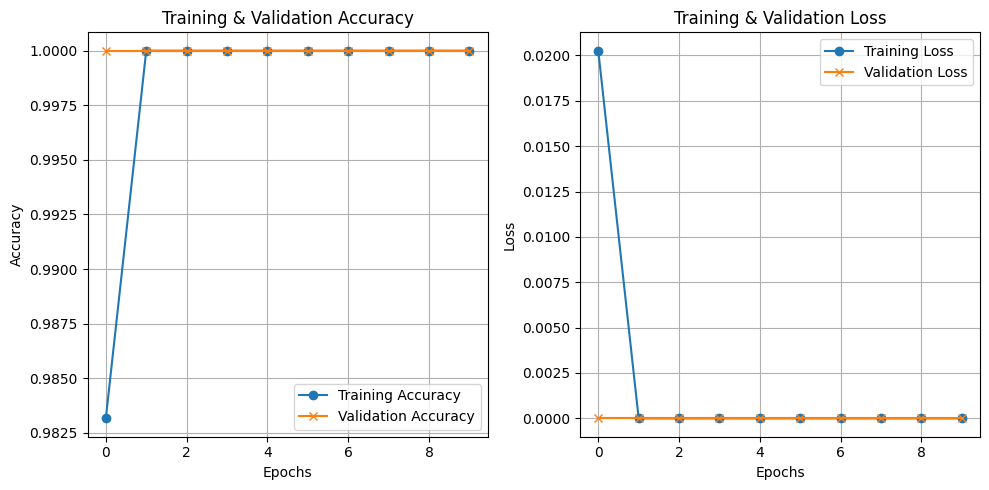

In [27]:
# STEP 1: Set number of epochs (same as you used in model.fit)
EPOCHS = 10  # or 20, whatever you used

# STEP 2: Extract metrics from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# STEP 3: Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

#  Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy', marker='o')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy', marker='x')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss', marker='o')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss', marker='x')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
